<a href="https://colab.research.google.com/github/jcsmcmendes/Step_Deep_Learning/blob/main/Classification_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📦 Dataset: CIFAR-10

This **CIFAR-10** dataset is a collection of labeled images and is one of the most basic and widely used datasets for practicing **Machine Learning** and **Computer Vision** techniques.

- It contains **60,000 color images** with a resolution of **32x32 pixels**
- The images are categorized into **10 different classes**:
  - ✈️ Airplanes
  - 🚗 Cars
  - 🐦 Birds
  - 🐱 Cats
  - 🦌 Deer
  - 🐶 Dogs
  - 🐸 Frogs
  - 🐴 Horses
  - 🚢 Ships
  - 🚚 Trucks
- Each class contains **6,000 images**, evenly distributed.

We will implement a neural network model to **classify new (test) images into one of these 10 categories**.


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Use only 25% of the training and test data to save memory
subset_size_train = int(0.25 * x_train.shape[0])  # 25% of 50,000 = 12,500
subset_size_test = int(0.25 * x_test.shape[0])    # 25% of 10,000 = 2,500

x_train = x_train[:subset_size_train]
y_train = y_train[:subset_size_train]

x_test = x_test[:subset_size_test]
y_test = y_test[:subset_size_test]

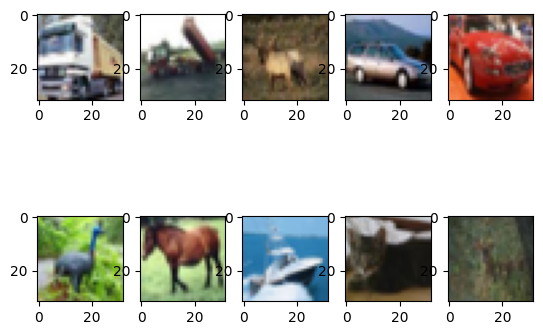

In [3]:
for i in range(1,11):
  plt.subplot(2, 5, i)
  plt.imshow(x_train[i])

In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape= (32,32,3)),
        tf.keras.layers.Conv2D(32, 3, padding = "valid", activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Conv2D(64, 3, activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Conv2D(128, 3, activation = "relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(10),

    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(),
    metrics =["accuracy"],
    )

In [7]:
model_history = model.fit(x_train, y_train, batch_size = 64, epochs = 10,verbose = 2)

Epoch 1/10
782/782 - 8s - 11ms/step - accuracy: 0.4491 - loss: 1.5088
Epoch 2/10
782/782 - 6s - 8ms/step - accuracy: 0.5908 - loss: 1.1514
Epoch 3/10
782/782 - 5s - 6ms/step - accuracy: 0.6547 - loss: 0.9803
Epoch 4/10
782/782 - 3s - 3ms/step - accuracy: 0.6984 - loss: 0.8595
Epoch 5/10
782/782 - 3s - 3ms/step - accuracy: 0.7274 - loss: 0.7782
Epoch 6/10
782/782 - 3s - 4ms/step - accuracy: 0.7534 - loss: 0.7077
Epoch 7/10
782/782 - 3s - 3ms/step - accuracy: 0.7724 - loss: 0.6499
Epoch 8/10
782/782 - 5s - 7ms/step - accuracy: 0.7904 - loss: 0.5973
Epoch 9/10
782/782 - 3s - 3ms/step - accuracy: 0.8108 - loss: 0.5425
Epoch 10/10
782/782 - 5s - 7ms/step - accuracy: 0.8259 - loss: 0.4955


<function matplotlib.pyplot.show(close=None, block=None)>

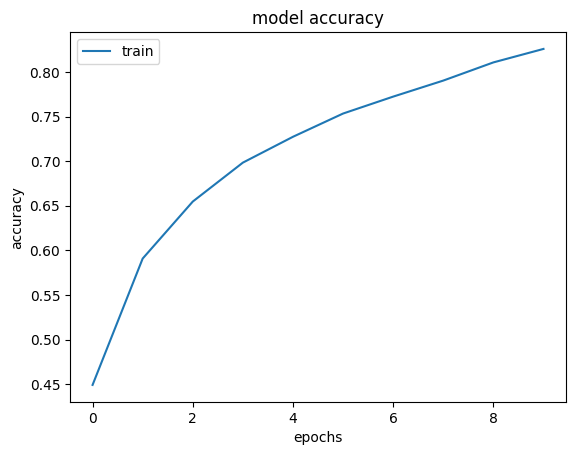

In [8]:
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Output Label: 8
ship


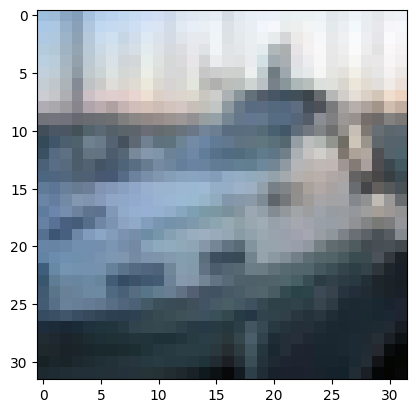

In [9]:
plt.imshow(x_test[2])

labels = ["airplane","automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
import cv2

resized_img = cv2.resize(x_test[2], (32,32))
resized_img= np.expand_dims(resized_img, axis=0)

pre=model.predict(resized_img)
n = np.argmax(pre)

print("Output Label:", n)
print(labels[n])

### 🔁 Transfer Learning with VGG16

In this section, we will use **Transfer Learning** to classify images from the **CIFAR-10** dataset using the **VGG16** architecture.

Instead of training a Convolutional Neural Network from scratch, we will:
- Use a **pretrained VGG16 model** trained on the **ImageNet** dataset (over 1 million images, 1000 classes)
- **Reuse the learned features** from the convolutional base of VGG16
- **Replace the top (dense) layers** with new ones adapted to our task (10 CIFAR-10 classes)
- **Fine-tune** the model or train only the new layers, depending on the configuration

📌 This approach allows us to:
- Save training time
- Improve performance, especially with limited data
- Benefit from features learned on a large and diverse image dataset

We will now proceed to load the pretrained model and prepare it for CIFAR-10 classification.


In [14]:
# Normalize and preprocess
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [16]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
# Load MobileNetV2 (smaller and efficient), adapted to 32x32 input
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

<ipython-input-17-85353a181699>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [26]:
# Unfreeze last 30 layers
for layer in base_model.layers[-30:]:
    layer.trainable = True


In [20]:
# Add new classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(10, activation='softmax')(x)


In [21]:
# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)


In [27]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 1,539,210 (5.87 MB)

 Non-trainable params: 731,584 (2.79 MB)

In [28]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.1456 - loss: 3.2395 - val_accuracy: 0.1107 - val_loss: 2.7933
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.2146 - loss: 2.4613 - val_accuracy: 0.1160 - val_loss: 3.9892
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.2408 - loss: 2.2285 - val_accuracy: 0.1887 - val_loss: 2.2685
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.2723 - loss: 2.0745 - val_accuracy: 0.3021 - val_loss: 1.9675
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2946 - loss: 1.9942 - val_accuracy: 0.3450 - val_loss: 1.8664
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3138 - loss: 1.9277 - val_accuracy: 0.3572 - val_loss: 1.8234
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3278 - loss: 1.8767 - val_accuracy: 0.3665 - val_loss: 1.7867
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3346 - loss: 

<function matplotlib.pyplot.show(close=None, block=None)>

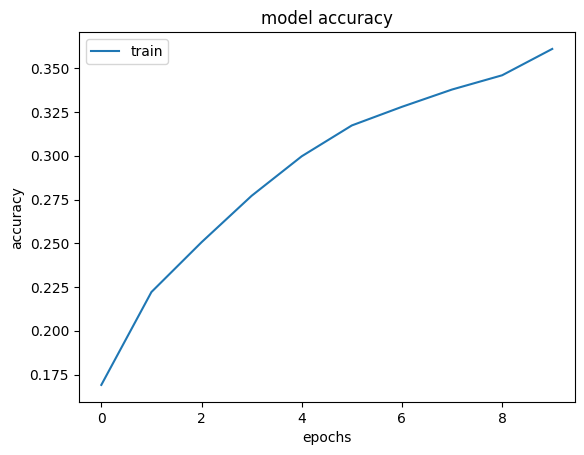

In [30]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show